<a href="https://colab.research.google.com/github/Salty-duck0/market-crash-analysis-using-LPPLS/blob/main/LPPLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/Salty-duck0/market-crash-analysis-using-LPPLS/main/data/DATA.csv')
data_v = data_raw.values
data = data_v[:1750]
date = data[:,0]
price = data[:,4].astype(float)

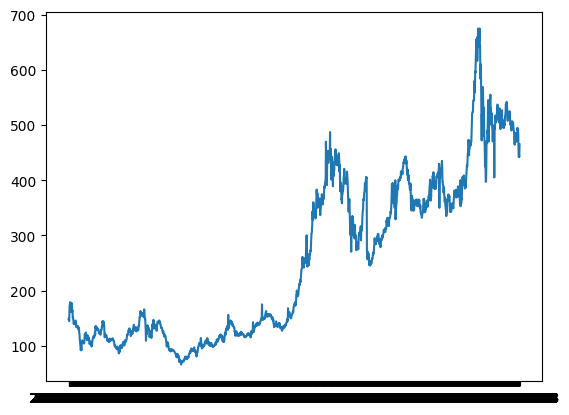

In [3]:
plt.plot(date,price)

In [4]:
!pip install -U lppls

In [5]:
from lppls import lppls
from lppls import lppls_cmaes
import datetime
price_log = np.log(price)

time = [pd.Timestamp.toordinal(datetime.datetime.strptime(t1, '%Y-%m-%d')) for t1 in date]

# create Mx2 matrix (expected format for LPPLS observations)
observations = np.array([time, price_log])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2,o,d = lppls_model.fit(MAX_SEARCHES,minimizer='SLSQP')
def lppls(t, tc, m, w, a, b, c1, c2):
  return a + np.power(tc - t, m) * (b + ((c1 * np.cos(w * np.log(tc - t))) + (c2 * np.sin(w * np.log(tc - t)))))
fit=lppls(time, tc, m, w, a, b, c1, c2)
print(datetime.datetime.fromordinal(int(tc)))

2006-12-18 00:00:00


<function matplotlib.pyplot.show(close=None, block=None)>

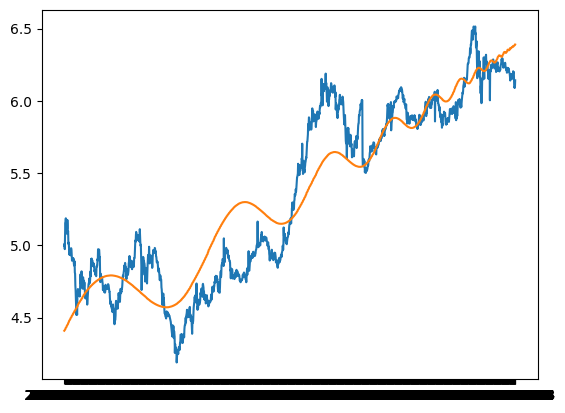

In [6]:
plt.plot(date,price_log, color ='tab:blue')
plt.plot(date,fit, color ='tab:orange')
plt.show

100%|██████████| 816/816 [18:26<00:00,  1.36s/it]


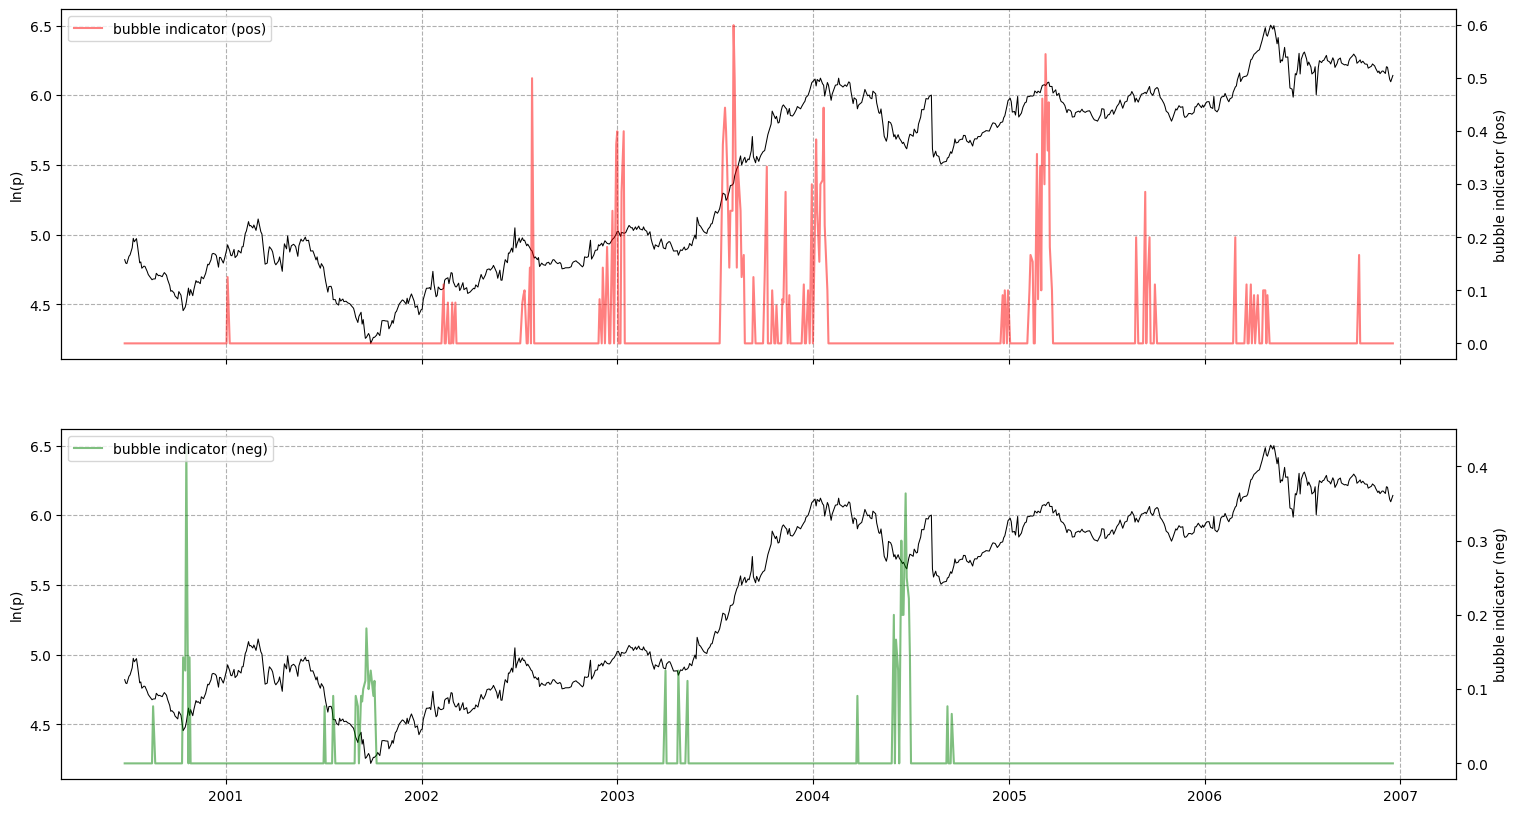

In [8]:
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=120,
    smallest_window_size=40,
    outer_increment=2,
    inner_increment=5,
    max_searches=25,
)

lppls_model.plot_confidence_indicators(res)